# Plot Figures 2a and 2b

## Load libraries

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.ticker as tck
plt.style.reload_library()


## Load saved data

In [2]:
accuracies = pd.read_pickle('data/accuracies.pkl')
complexity = pd.read_pickle('data/complexity.pkl')

# Stat complexity
complexities_mean = complexity.groupby(level=0).mean()
complexities_std = complexity.groupby(level=0).std()

# Stat accuracy
accuracies_mean = accuracies.groupby(level=0).mean()*100
accuracies_std = accuracies.groupby(level=0).std()*100

# find the absolute difference between the best algorithm and other algorithms
best_performance = accuracies_mean.max(axis=1)
diff_to_best = accuracies_mean.sub(best_performance, axis=0).abs()


## Plot Figure 2a

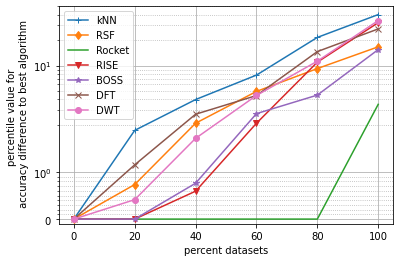

In [7]:
perctiles = np.arange(0,1.2,.2)
perc_accuracy = diff_to_best.quantile(q=perctiles)
labels_xaxis = np.array(100*perctiles, dtype=int)

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(perctiles, perc_accuracy["kNN"], marker = "+", label="kNN")
ax.plot(perctiles, perc_accuracy["RSF"], marker = "d", label="RSF")
ax.plot(perctiles, perc_accuracy["Rocket"], marker = "", label="Rocket")
ax.plot(perctiles, perc_accuracy["RISE"], marker = "v", label="RISE")
ax.plot(perctiles, perc_accuracy["BOSS"], marker = "*", label="BOSS")
ax.plot(perctiles, perc_accuracy["DFT"], marker = "x", label="DFT")
ax.plot(perctiles, perc_accuracy["DWT"], marker = "o", label="DWT")


plt.xticks(perctiles, labels=labels_xaxis)
ax.set_ylim(-0.1,50)
ax.set_yscale('symlog')
ax.yaxis.set_minor_locator(tck.SymmetricalLogLocator(base=10, linthresh=.1, subs=np.arange(1, 10)))

ax.set_ylabel('percentile value for \n accuracy difference to best algorithm')
ax.set_xlabel('percent datasets')

ax.legend(loc=2)
ax.grid(which="major")
ax.grid(which="minor", ls=":")
plt.savefig("fig2a.pdf", dpi=100, bbox_inches="tight", format="pdf")


## Plot Figure 2b

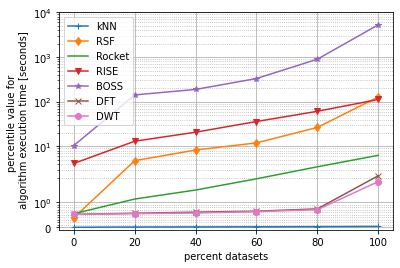

In [8]:
perctiles = np.arange(0,1.2,.2)

perc_complexity = complexities_mean.quantile(q=perctiles)
labels_xaxis = np.array(100*perctiles, dtype=int)


fig = plt.figure()
ax = fig.add_subplot()
ax.plot(perctiles, perc_complexity["kNN"], marker = "+", label="kNN")
ax.plot(perctiles, perc_complexity["RSF"], marker = "d", label="RSF")
ax.plot(perctiles, perc_complexity["Rocket"], marker = "", label="Rocket")
ax.plot(perctiles, perc_complexity["RISE"], marker = "v", label="RISE")
ax.plot(perctiles, perc_complexity["BOSS"], marker = "*", label="BOSS")
ax.plot(perctiles, perc_complexity["DFT"], marker = "x", label="DFT")
ax.plot(perctiles, perc_complexity["DWT"], marker = "o", label="DWT")

ax.set_ylabel('percentile value for \n algorithm execution time [seconds]')
ax.set_xlabel('percent datasets')
plt.xticks(perctiles, labels=labels_xaxis)
ax.set_ylim(-0.1,10000)
ax.set_yscale('symlog')
ax.yaxis.set_minor_locator(tck.SymmetricalLogLocator(base=10, linthresh=.1, subs=np.arange(1, 10)))

ax.legend(loc=2)
ax.grid(which="major")
ax.grid(which="minor", ls=":")
plt.savefig("fig2b.pdf", dpi=100, bbox_inches="tight", format="pdf")